## 1. Importing Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install transformers==4.37.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 93.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 97.4 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully uninstalled tokenizers-0.19.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.42.4
    Uninstalling transformers-4.42.4:
      Successfully uninstalled transformers-4.42.4


In [3]:
!pip install tf_keras==2.15.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 67.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 76.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 96.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.2 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.0
    Uninstalling ml-dtypes-0.4.0:
      Successfully uninstalled ml-dtypes-0.4.0
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled ke

In [4]:
!pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 12.6 MB/s eta 0:00:00


In [5]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [7]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [8]:
!pip install autocorrect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 20.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622364 sha256=ae6c07c2e2b16599b6a27e9c9a173fa429be4aa6eb9546ec24585ea396e25a2b
  Stored in directory: /root/.cache/pip/wheels/b5/7b/6d/b76b29ce11ff8e2521c8c7dd0e5bfee4fb1789d76193124343
Successfully built autocorrect


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore")

import nltk

# It helps to remove the accented characters
import unidecode

from nltk.tokenize import word_tokenize,sent_tokenize,regexp_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re,string,unicodedata
from wordcloud import WordCloud,STOPWORDS
from bs4 import BeautifulSoup

# It help to correct the spellings
from autocorrect import Speller

from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay, accuracy_score,f1_score,precision_score,recall_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense,Input, Embedding,LSTM,Dropout,Conv1D, MaxPooling1D, GlobalAveragePooling1D, GlobalMaxPooling1D,Dropout,Bidirectional,Flatten,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
import transformers
import tokenizers
import json

# 2. Data Extraction and Cleaning

In [10]:
data=pd.read_csv('/content/drive/MyDrive/thought classification/data_thought.csv')

In [11]:
data.head()

,Thought,Label
0,Everyone is probably mad at me,negative
1,You're braver than you believe,positive
2,"When I open my eyes, you're all that I want to...",positive
3,They clearly don’t want to be friends with me ...,negative
4,I've never done it before.,negative


In [12]:
data.tail()

,Thought,Label
156780,I can't believe how fast time flies.,negative
156781,I can't eat spicy food.,negative
156782,Itâ€™s OK to SCREW Up! Nigel Raw,positive
156783,Itâ€™s here. Itâ€™s beautiful. Itâ€™s signed. ...,positive
156784,Stuck On You â€“ Cover by Alicia Widar,negative


In [13]:
## Assess the shape of the data
print("The Shape of the Dataset",data.shape)

The Shape of the Dataset (156785, 2)


In [14]:
data.describe()

,Thought,Label
count,156785,156785
unique,129051,2
top,Help,positive
freq,65,85677


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156785 entries, 0 to 156784
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Thought  156785 non-null  object
 1   Label    156785 non-null  object
dtypes: object(2)
memory usage: 2.4+ MB


In [16]:
data['Label'].unique()

array(['negative', 'positive'], dtype=object)

In [17]:
print(data['Label'].value_counts())

Label
positive    85677
negative    71108
Name: count, dtype: int64


In [18]:
null_values = data.isnull().sum()  #check null values
print(null_values)

Thought    0
Label      0
dtype: int64


In [19]:
data = data.dropna(how='any',axis=0) #drop null values

In [20]:
num_duplicates = data.duplicated().sum() #identify duplicates
print('There are {} duplicate thought present in the dataset'.format(num_duplicates))

There are 27705 duplicate thought present in the dataset


In [ ]:
"""
#view duplicate thoughts
thought = data['Thought']
duplicated_thought = data[thought.isin(thought[thought.duplicated()])].sort_values("Thought")
duplicated_thought.head()
"""

In [21]:
#drop duplicate thoughts
data.drop_duplicates(inplace = True)

In [22]:
#reseting the index of data frame since some rows have been deleted
data.reset_index(drop=True, inplace=True)

In [23]:
print('The dataset contains {} rows and {} columns after removing duplicates'.format(data.shape[0],data.shape[1]))

The dataset contains 129080 rows and 2 columns after removing duplicates


In [24]:
# Define a custom set of stopwords excluding pronouns and sentiment-carrying words
custom_stopwords = set([
    'a', 'about', 'above', 'after', 'again', 'against', 'all', 'am', 'an', 'and', 'any', 'are', 'aren\'t', 'as', 'at',
    'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'cannot', 'can\'t',
    'could', 'couldn\'t', 'did', 'didn\'t', 'do', 'does', 'doesn\'t', 'doing', 'don\'t', 'down', 'during', 'each',
    'few', 'for', 'from', 'further', 'had', 'hadn\'t', 'has', 'hasn\'t', 'have', 'haven\'t', 'having', 'he',
    'he\'d', 'he\'ll', 'he\'s', 'her', 'here', 'here\'s', 'hers', 'herself', 'him', 'himself', 'his', 'how',
    'how\'s', 'if', 'in', 'into', 'is', 'isn\'t', 'it', 'it\'s', 'its', 'itself', 'let\'s', 'me', 'more', 'most',
    'mustn\'t', 'my', 'myself', 'no', 'nor', 'not', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'ought',
    'our', 'ours', 'ourselves', 'out', 'over', 'own', 'same', 'shan\'t', 'she', 'she\'d', 'she\'ll', 'she\'s',
    'should', 'shouldn\'t', 'so', 'some', 'such', 'than', 'that', 'that\'s', 'the', 'their', 'theirs', 'them',
    'themselves', 'then', 'there', 'there\'s', 'these', 'they', 'they\'d', 'they\'ll', 'they\'re', 'they\'ve',
    'this', 'those', 'through', 'to', 'too', 'under', 'until', 'up', 'very', 'was', 'wasn\'t', 'we', 'we\'d',
    'we\'ll', 'we\'re', 'we\'ve', 'were', 'weren\'t', 'what', 'what\'s', 'when', 'when\'s', 'where', 'where\'s',
    'which', 'while', 'who', 'who\'s', 'whom', 'why', 'why\'s', 'with', 'won\'t', 'would', 'wouldn\'t',
    'you', 'you\'d', 'you\'ll', 'you\'re', 'you\'ve', 'your', 'yours', 'yourself', 'yourselves'
]) - {'i', 'we', 'me', 'you', 'they', 'no', 'not', 'aren\'t', 'cannot', 'can\'t', 'don\'t', 'didn\'t',  'doesn\'t','won\'t', 'couldn\'t',
      'hadn\'t', 'hasn\'t', 'haven\'t', 'isn\'t', 'mustn\'t', 'shan\'t', 'shouldn\'t', 'wasn\'t', 'weren\'t', 'won\'t', 'wouldn\'t'}

In [25]:
# Contraction map
contraction_mapping  = {"ain't": "is not", "aren't": "are not","can't": "can not",
           "'cause": "because", "could've": "could have", "couldn't": "could not",
           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not",
           "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will",
           "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will",
           "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will",
           "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have",
           "i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have",
           "it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not",
           "might've": "might have","mightn't": "might not","mightn't've": "might not have",
           "must've": "must have", "mustn't": "must not", "mustn't've": "must not have",
           "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not",
           "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would",
           "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have",
           "she's": "she is", "should've": "should have", "shouldn't": "should not",
           "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is",
           "that'd": "that would", "that'd've": "that would have", "that's": "that is",
           "there'd": "there would", "there'd've": "there would have", "there's": "there is",
           "here's": "here is","they'd": "they would", "they'd've": "they would have",
           "they'll": "they will", "they'll've": "they will have", "they're": "they are",
           "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would",
           "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have",
           "we're": "we are", "we've": "we have", "weren't": "were not",
           "what'll": "what will", "what'll've": "what will have","what're": "what are",
           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have",
           "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will",
           "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is",
           "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have",
           "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have",
           "y'all're": "you all are","y'all've": "you all have","you'd": "you would",
           "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
           "you're": "you are", "you've": "you have" }

## Text Preprocessing

### Remove accented characters

In [26]:
# defining an empty list
text = []

# looping over each message in the data
for i in range(data.shape[0]):

    t = data['Thought'][i].split()
    # Applying the unicode data on a sentence and replacing the accented words to get the closest possible ASCII text
    new_text = [unidecode.unidecode(word) for word in t]

    # Combining the seperate words into sentence
    new_text = ' '.join(new_text)
    # append the new_text to list text
    text.append(new_text)

data['cleaned_text'] = text

### Lowercasing

In [27]:
# defining an empty list
text = []

# looping over each message in the data
for i in range(data.shape[0]):
    # lowecasing the text using the lower() function
    new_text = data['cleaned_text'][i].lower()
    text.append(new_text) # append the new_text to empty list text

data['cleaned_text'] = text

In [28]:
#emoji clean
def clean_emoji(text):
    emoji_clean= re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_clean.sub(r'',text)

# Removing URL's
def remove_URL(text):
    return re.sub(r'http\S+', '', text)
# remove all single characters

# Substituting multiple spaces with single space
def Sub_multiple_space(text):
    return re.sub(r'\s+', ' ', text, flags=re.I)

#Removing the noisy text
def exclude_noisy_text(text):
  text = clean_emoji(text)
  text = remove_URL(text)
  text = Sub_multiple_space(text)

  return text



In [29]:
data['cleaned_text']=data['cleaned_text'].apply(exclude_noisy_text)

### Expand contractions

In [30]:
# Function to expand contractions using the predefined map
def expand_contractions(text):
    for contraction, expanded in contraction_mapping.items():
        text = re.sub(r'\b' + contraction + r'\b', expanded, text)
    return text

In [31]:
# defining an empty list
text = []

# looping over each message in the data
for i in range(data.shape[0]):
    # applying the autospell function on the text messages
    new_text = expand_contractions(data['cleaned_text'][i])
    text.append(new_text) # append the new_text to empty list text

data['cleaned_text'] = text

### Removing punctuation

In [32]:
#removing punctuation
text = []

# looping over each message in the data
for i in range(data.shape[0]):
    words = data['cleaned_text'][i].split() # splitting text into separate words
    # Create a translation table that maps each punctuation character to None
    translator = str.maketrans('', '', ',.!:')
    # Use the translate method to remove punctuation
    new_text = ' '.join([word.translate(translator) for word in words])
    text.append(new_text)
data['cleaned_text'] = text

### Removing Special Characters

In [33]:
# defining an empty list
text = []

# looping over each message in the data
for i in range(data.shape[0]):
    words = data['cleaned_text'][i].split() # splitting text into separate words
    new_text = ' '.join([element for element in words if element.isalnum()]) # looping over each element of the list and using the join() function to retrive the original text
    text.append(new_text)  # append the new_text to empty list text

data['cleaned_text'] = text

In [34]:
data.head()

,Thought,Label,cleaned_text
0,Everyone is probably mad at me,negative,everyone is probably mad at me
1,You're braver than you believe,positive,you are braver than you believe
2,"When I open my eyes, you're all that I want to...",positive,when i open my eyes you are all that i want to...
3,They clearly don’t want to be friends with me ...,negative,they clearly do not want to be friends with me...
4,I've never done it before.,negative,i have never done it before


In [35]:
data.tail()

,Thought,Label,cleaned_text
129075,Their appreciation for complexity allows them ...,positive,their appreciation for complexity allows them ...
129076,I can't wait to go on vacation next month.,negative,i can not wait to go on vacation next month
129077,Itâ€™s OK to SCREW Up! Nigel Raw,positive,ok to screw up nigel raw
129078,Itâ€™s here. Itâ€™s beautiful. Itâ€™s signed. ...,positive,here beautiful signed it fits right in
129079,Stuck On You â€“ Cover by Alicia Widar,negative,stuck on you cover by alicia widar


### Spellchecking

In [35]:
# intializing the spellchecker and setting the language to english
spell = Speller(lang = 'en')

# defining a function which will take text as an input break
def autospell(text):
    '''
    A function which takes text as an input, performs a spell check, and autocorrects misspelled words
    text: text input (object)
    '''
    word = text.split() # splitting text into separate words
    spells = [spell(w) for w in word] # Spell checking on each word
    return " ".join(spells) # retriving the original text


In [36]:

# defining an empty list
text = []

# looping over each message in the data
for i in range(data.shape[0]):
    # applying the autospell function on the text messages
    new_text = autospell(data['cleaned_text'][i])
    text.append(new_text) # append the new_text to empty list text

data['cleaned_text'] = text


### Define consolidate pronoun Function

In [36]:
# Function to consolidate pronouns
def consolidate_pronouns(tokens):
    consolidated_tokens = []
    for token in tokens.split():
        if token in ['i', 'we', 'me']:
            consolidated_tokens.append('me')
        elif token in ['you']:
            consolidated_tokens.append('you')
        elif token in ['they', 'them']:
            consolidated_tokens.append('they')
        else:
            consolidated_tokens.append(token)

    return ' '.join(consolidated_tokens)

In [37]:
wl = WordNetLemmatizer()

In [38]:
#tokenization and removing stop words
def tokenization(text):
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in custom_stopwords]  #Removing stop words
    return " ".join(filtered_text)


#lemmatize
def lemmatization(text, lemmatize= True):
    if lemmatize:
        return " ".join([wl.lemmatize(word) for word in text.split() if word not in custom_stopwords and word.isalpha()])
    else:
        return " ".join([word for word in text.split() if word not in custom_stopwords and word.isalpha()])

#Removing the noisy text
def clean_text(text):

    text = consolidate_pronouns(text)
    text = tokenization(text)
    text = lemmatization(text, lemmatize= True)


    return text

In [39]:
data_copy = data.copy()

In [40]:
#data['Thought_clean']=data['Thought'].apply(clean_text,lemmatize = True)
data['Thought_clean']=data['cleaned_text'].apply(clean_text)

In [41]:
data.head()

,Thought,Label,cleaned_text,Thought_clean
0,Everyone is probably mad at me,negative,everyone is probably mad at me,everyone probably mad me
1,You're braver than you believe,positive,you are braver than you believe,you braver you believe
2,"When I open my eyes, you're all that I want to...",positive,when i open my eyes you are all that i want to...,me open eye you me want see
3,They clearly don’t want to be friends with me ...,negative,they clearly do not want to be friends with me...,they clearly not want friend me anymore
4,I've never done it before.,negative,i have never done it before,me never done


In [42]:
data.tail()

,Thought,Label,cleaned_text,Thought_clean
129075,Their appreciation for complexity allows them ...,positive,their appreciation for complexity allows them ...,appreciation complexity allows they see interc...
129076,I can't wait to go on vacation next month.,negative,i can not wait to go on vacation next month,me can not wait go vacation next month
129077,Itâ€™s OK to SCREW Up! Nigel Raw,positive,ok to screw up nigel raw,ok screw nigel raw
129078,Itâ€™s here. Itâ€™s beautiful. Itâ€™s signed. ...,positive,here beautiful signed it fits right in,beautiful signed fit right
129079,Stuck On You â€“ Cover by Alicia Widar,negative,stuck on you cover by alicia widar,stuck you cover alicia widar


## 3. Exploratory data analysis

In [43]:
print(data['Label'].value_counts())

Label
positive    71185
negative    57895
Name: count, dtype: int64


In [44]:
print('Positive thoughts are', (round(data['Label'].value_counts()[0])),'i.e.', round(data['Label'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Negative thoughts are', (round(data['Label'].value_counts()[1])),'i.e.',round(data['Label'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

Positive thoughts are 71185 i.e. 55.15 % of the dataset
Negative thoughts are 57895 i.e. 44.85 % of the dataset


Text(0.5, 1.0, 'Thought Distribution')

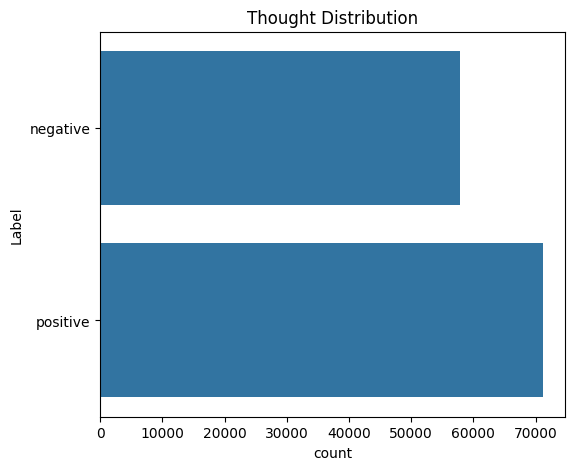

In [45]:
plt.figure(figsize =(6,5))
sns.countplot(data['Label'])
plt.title("Thought Distribution")

In [46]:
#converting target variable to numeric labels
data.Label = [ 1 if each == "positive" else 0 for each in data.Label]

## **Predictive Modelling using Deep Learning**

In [47]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  fig , ax = plt.subplots(1,2,figsize = (10,5))

  ax[0].plot(epochRange,history.history['accuracy'],label = 'Training Accuracy')
  ax[0].plot(epochRange,history.history['val_accuracy'],label = 'Validation Accuracy')
  ax[0].set_title('Training and Validation accuracy')
  ax[0].set_xlabel('Epoch')
  ax[0].set_ylabel('Accuracy')
  ax[0].legend()
  ax[1].plot(epochRange,history.history['loss'],label = 'Training Loss')
  ax[1].plot(epochRange,history.history['val_loss'],label = 'Validation Loss')
  ax[1].set_title('Training and Validation loss')
  ax[1].set_xlabel('Epoch')
  ax[1].set_ylabel('Loss')
  ax[1].legend()
  fig.tight_layout()
  plt.show()

In [48]:
#splitting into train and test
data_copy['cleaned_text']=data_copy['cleaned_text'].apply(clean_text)
#converting target variable to numerical value
data_copy.Label = [ 1 if each == "positive" else 0 for each in data_copy.Label]
train, test= train_test_split(data_copy, test_size=0.2, random_state=42)
Xtrain, ytrain = train['cleaned_text'], train['Label']
Xtest, ytest = test['cleaned_text'], test['Label']

In [49]:
#set up the tokenizer
MAX_VOCAB_SIZE = 10000
tokenizer = Tokenizer(num_words = MAX_VOCAB_SIZE,oov_token="<oov>")
tokenizer.fit_on_texts(Xtrain)
word_index = tokenizer.word_index

V = len(word_index)
print("Vocabulary of the dataset is : ",V)

Vocabulary of the dataset is :  34080


In [50]:
#print(word_index)

In [51]:
##create sequences of thoughts
seq_train = tokenizer.texts_to_sequences(Xtrain)
seq_test =  tokenizer.texts_to_sequences(Xtest)

In [52]:
#choice of maximum length of sequences
seq_len_list = [len(i) for i in seq_train + seq_test]

#if we take the direct maximum then
max_len=max(seq_len_list)
print('Maximum length of sequence in the list: {}'.format(max_len))

Maximum length of sequence in the list: 90


In [53]:
# when setting the maximum length of sequence, variability around the average is used.
max_seq_len = np.mean(seq_len_list) + 2 * np.std(seq_len_list)
max_seq_len = int(max_seq_len)
print('Maximum length of the sequence when considering data only two standard deviations from average: {}'.format(max_seq_len))

Maximum length of the sequence when considering data only two standard deviations from average: 15


In [54]:
perc_covered = np.sum(np.array(seq_len_list) < max_seq_len) / len(seq_len_list)*100
print('The above calculated number coveres approximately {} % of data'.format(np.round(perc_covered,2)))

The above calculated number coveres approximately 95.3 % of data


### **BERT Based Models**

In [55]:
train, test= train_test_split(data_copy, test_size=0.2, random_state=42)
Xtrain, ytrain = train['cleaned_text'], train['Label']
Xtest, ytest = test['cleaned_text'], test['Label']
#splitting the train set into train and validation
Xtrain,Xval,ytrain,yval=train_test_split(Xtrain,ytrain,
                                             test_size=0.2,random_state=10)

In [56]:
# Create dataframes for each split
train_df = pd.DataFrame({'cleaned_text': Xtrain, 'Label': ytrain})
train_df['split'] = 'train'

val_df = pd.DataFrame({'cleaned_text': Xval, 'Label': yval})
val_df['split'] = 'val'

test_df = pd.DataFrame({'cleaned_text': Xtest, 'Label': ytest})
test_df['split'] = 'test'

# Combine all dataframes
combined_df = pd.concat([train_df, val_df, test_df]).reset_index(drop=True)

# Save to CSV
combined_df.to_csv('BERT_data_split.csv', index=False)

# Convert to dictionary for JSON
data_dict = combined_df.to_dict(orient='records')

# Save to JSON
with open('BERT_data_split.json', 'w') as json_file:
    json.dump(data_dict, json_file, indent=4)

print("CSV and JSON files have been created successfully.")

CSV and JSON files have been created successfully.


**BERT**

In [562]:
#Perform tokenization
# automatically download the vocab used during pretraining or fine-tuning a given model,use from_pretrained() method

In [563]:
tokenizer = transformers.AutoTokenizer.from_pretrained('bert-base-uncased')

In [564]:
#pass our texts to the tokenizer.
Xtrain_enc = tokenizer(Xtrain.tolist(), max_length=max_seq_len,
                         truncation=True, padding='max_length',
                         add_special_tokens=True, return_tensors='tf') #return numpy object
Xval_enc = tokenizer(Xval.tolist(), max_length=max_seq_len,
                         truncation=True, padding='max_length',
                         add_special_tokens=True, return_tensors='tf') #return numpy object
Xtest_enc = tokenizer(Xtest.tolist(), max_length=max_seq_len,
                         truncation=True, padding='max_length',
                         add_special_tokens=True, return_tensors='tf') #return numpy object

In [565]:
#preparing our datasets
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(Xtrain_enc),
    ytrain
))
val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(Xval_enc),
    yval
))
test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(Xtest_enc),
    ytest
))

In [566]:
def bert_model(train_dataset,val_dataset,transformer,max_len,epochs):
    print("----Building the model----")
    input_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_ids")
    attention_mask = Input(shape=(max_len,),dtype=tf.int32,name = 'attention_mask') #attention mask
    sequence_output = transformer(input_ids,attention_mask)[0]
    cls_token = sequence_output[:, 0, :]

    x = Dense(128, activation='relu')(cls_token)

    x = Dropout(0.5)(x)

    y = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=[input_ids,attention_mask], outputs=y)
    model.summary()
    model.compile(Adam(learning_rate=1.5e-5), loss='binary_crossentropy', metrics=['accuracy'])
    r = model.fit(train_dataset.batch(12),batch_size = 12, validation_data = val_dataset.batch(12),epochs = epochs)
                  #callbacks = callbacks
    print("Train score:", model.evaluate(train_dataset.batch(12)))
    print("Validation score:", model.evaluate(val_dataset.batch(12)))
    n_epochs = len(r.history['loss'])

    return r,model,n_epochs

In [567]:
transformer = transformers.TFBertModel.from_pretrained('bert-base-uncased', resume_download=True)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [568]:
epochs = 2
max_len = max_seq_len
r,model,n_epochs = bert_model(train_dataset,val_dataset,transformer,max_len,epochs)

----Building the model----
Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 15)]                 0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 15)]                 0         []                            
 )                                                                                                
                                                                                                  
 tf_bert_model_3 (TFBertMod  TFBaseModelOutputWithPooli   1094822   ['input_ids[0][0]',           
 el)                         ngAndCrossAttentions(last_   40         'attention_mask[0][0]']      
                             hidden_state=(None, 15, 76          

6885/6885 [==============================] - 641s 88ms/step - loss: 0.1909 - accuracy: 0.9269 - val_loss: 0.1264 - val_accuracy: 0.9513
Epoch 2/2
6885/6885 [==============================] - 165s 24ms/step - loss: 0.0492 - accuracy: 0.9840
Train score: [0.04923732951283455, 0.9839972853660583]
1722/1722 [==============================] - 41s 24ms/step - loss: 0.1286 - accuracy: 0.9527
Validation score: [0.1286192238330841, 0.9526945352554321]


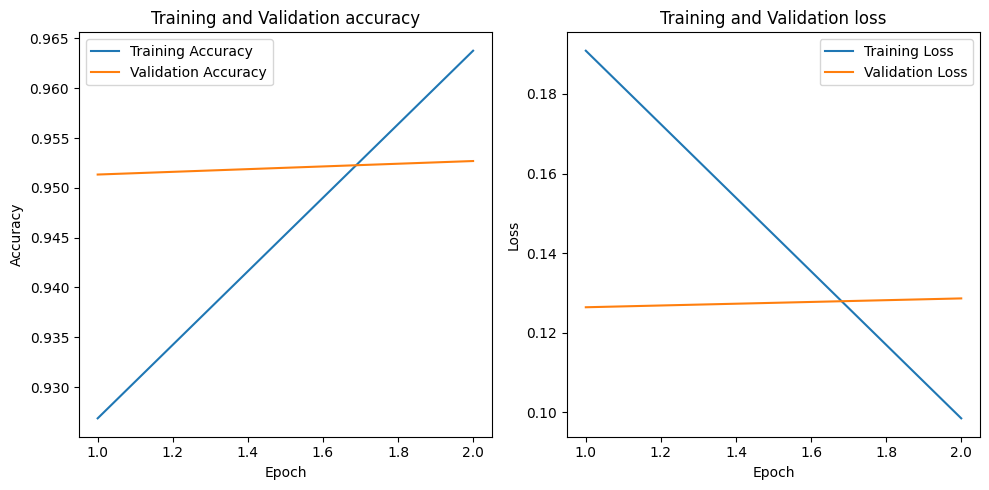

In [569]:
#Plot accuracy and loss
plotLearningCurve(r,n_epochs)

In [570]:
print("Evaluate Model Performance on Test set")
result = model.evaluate(test_dataset.batch(32))
print(dict(zip(model.metrics_names, result)))

Evaluate Model Performance on Test set
807/807 [==============================] - 34s 42ms/step - loss: 0.1372 - accuracy: 0.9513
{'loss': 0.13724283874034882, 'accuracy': 0.9512705206871033}


2152/2152 [==============================] - 61s 27ms/step


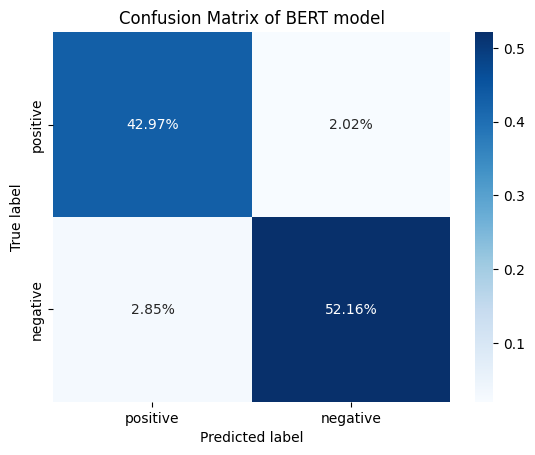

In [571]:
#Generate predictions for the test dataset
ypred = model.predict(test_dataset.batch(12))
ypred = ypred>0.5
#Get the confusion matrix
cf_matrix = confusion_matrix(ytest, ypred)
#sns.heatmap(cf_matrix,annot = True,fmt ='g', cmap='Blues', xticklabels=['positive','negative'], yticklabels=['positive','negative'])
sns.heatmap(cf_matrix/np.sum(cf_matrix),annot = True,fmt ='.2%', cmap='Blues', xticklabels=['positive','negative'], yticklabels=['positive','negative'])
plt.title("Confusion Matrix of BERT model")
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [572]:
print(classification_report(ytest,ypred,target_names=['Positive','Negative']))

              precision    recall  f1-score   support

    Positive       0.94      0.96      0.95     11614
    Negative       0.96      0.95      0.96     14202

    accuracy                           0.95     25816
   macro avg       0.95      0.95      0.95     25816
weighted avg       0.95      0.95      0.95     25816



### **Distilbert Model**

In [500]:
tokenizer = transformers.AutoTokenizer.from_pretrained('distilbert-base-uncased')

In [501]:
#pass our texts to the tokenizer.
Xtrain_enc = tokenizer(Xtrain.tolist(), max_length=max_seq_len,
                         truncation=True, padding='max_length',
                         add_special_tokens=True, return_tensors='tf') #return numpy object
Xval_enc = tokenizer(Xval.tolist(), max_length=max_seq_len,
                         truncation=True, padding='max_length',
                         add_special_tokens=True, return_tensors='tf') #return numpy object
Xtest_enc = tokenizer(Xtest.tolist(), max_length=max_seq_len,
                         truncation=True, padding='max_length',
                         add_special_tokens=True, return_tensors='tf') #return numpy object

In [502]:
#preparing our datasets
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(Xtrain_enc),
    ytrain
))
val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(Xval_enc),
    yval
))
test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(Xtest_enc),
    ytest
))

In [503]:
transformer = transformers.TFDistilBertModel.from_pretrained('distilbert-base-uncased', resume_download=True)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_transform.bias', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [504]:
epochs = 2
max_len = max_seq_len
r,model,n_epochs = bert_model(train_dataset,val_dataset,transformer,max_len,epochs)

----Building the model----
Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 15)]                 0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 15)]                 0         []                            
 )                                                                                                
                                                                                                  
 tf_distil_bert_model_3 (TF  TFBaseModelOutput(last_hid   6636288   ['input_ids[0][0]',           
 DistilBertModel)            den_state=(None, 15, 768),   0          'attention_mask[0][0]']      
                              hidden_states=None, atten          

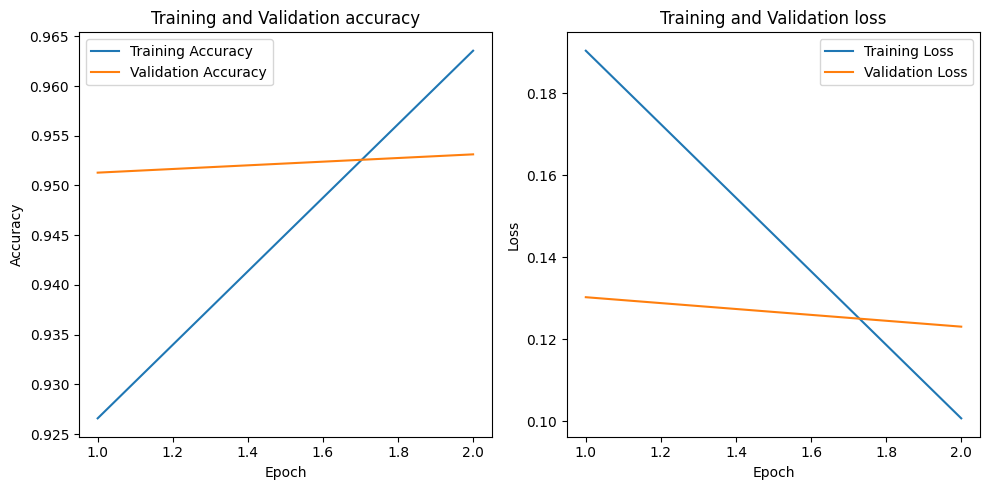

In [505]:
#Plot accuracy and loss
plotLearningCurve(r,n_epochs)

In [506]:
print("Evaluate DistilBert Model Performance on Test set")
result = model.evaluate(test_dataset.batch(32))
print(dict(zip(model.metrics_names, result)))

Evaluate DistilBert Model Performance on Test set
807/807 [==============================] - 17s 21ms/step - loss: 0.1296 - accuracy: 0.9516
{'loss': 0.12960569560527802, 'accuracy': 0.9516191482543945}


2152/2152 [==============================] - 29s 13ms/step


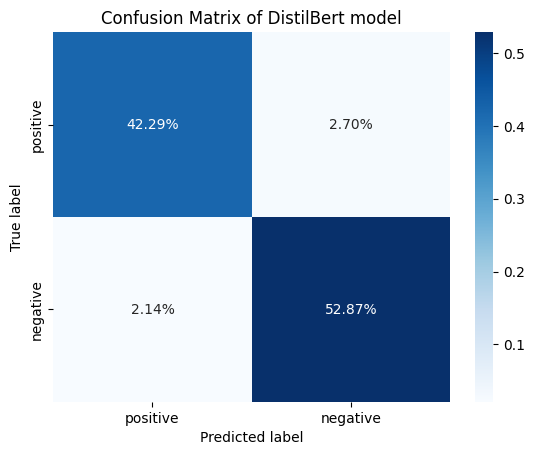

In [507]:
#Generate predictions for the test dataset
ypred = model.predict(test_dataset.batch(12))
ypred = ypred>0.5
#Get the confusion matrix
cf_matrix = confusion_matrix(ytest, ypred)
#sns.heatmap(cf_matrix,annot = True,fmt ='g', cmap='Blues', xticklabels=['positive','negative'], yticklabels=['positive','negative'])
sns.heatmap(cf_matrix/np.sum(cf_matrix),annot = True,fmt ='.2%', cmap='Blues', xticklabels=['positive','negative'], yticklabels=['positive','negative'])
plt.title("Confusion Matrix of DistilBert model")
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [508]:
print(classification_report(ytest,ypred,target_names=['Positive','Negative']))

              precision    recall  f1-score   support

    Positive       0.95      0.94      0.95     11614
    Negative       0.95      0.96      0.96     14202

    accuracy                           0.95     25816
   macro avg       0.95      0.95      0.95     25816
weighted avg       0.95      0.95      0.95     25816



### **RoBERTa Model**

In [164]:
tokenizer = transformers.AutoTokenizer.from_pretrained('roberta-base')

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [165]:
#pass our texts to the tokenizer.
Xtrain_enc = tokenizer(Xtrain.tolist(), max_length=max_seq_len,
                         truncation=True, padding='max_length',
                         add_special_tokens=True, return_tensors='tf') #return numpy object
Xval_enc = tokenizer(Xval.tolist(), max_length=max_seq_len,
                         truncation=True, padding='max_length',
                         add_special_tokens=True, return_tensors='tf') #return numpy object
Xtest_enc = tokenizer(Xtest.tolist(), max_length=max_seq_len,
                         truncation=True, padding='max_length',
                         add_special_tokens=True, return_tensors='tf') #return numpy object

In [166]:
#preparing our datasets
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(Xtrain_enc),
    ytrain
))
val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(Xval_enc),
    yval
))
test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(Xtest_enc),
    ytest
))

In [167]:
transformer = transformers.TFRobertaModel.from_pretrained('roberta-base', resume_download=True)

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['lm_head.layer_norm.weight', 'lm_head.dense.bias', 'roberta.embeddings.position_ids', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaModel were not initialized from the PyTorch model and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and infe

In [168]:
epochs = 2
max_len = max_seq_len
r,model,n_epochs = bert_model(train_dataset,val_dataset,transformer,max_len,epochs)

----Building the model----
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 15)]                 0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 15)]                 0         []                            
 )                                                                                                
                                                                                                  
 tf_roberta_model (TFRobert  TFBaseModelOutputWithPooli   1246456   ['input_ids[0][0]',           
 aModel)                     ngAndCrossAttentions(last_   32         'attention_mask[0][0]']      
                             hidden_state=(None, 15, 76          

6885/6885 [==============================] - 655s 89ms/step - loss: 0.2274 - accuracy: 0.9116 - val_loss: 0.1417 - val_accuracy: 0.9466
Epoch 2/2
6885/6885 [==============================] - 181s 26ms/step - loss: 0.0825 - accuracy: 0.9704
Train score: [0.08253704756498337, 0.9704397916793823]
1722/1722 [==============================] - 43s 25ms/step - loss: 0.1350 - accuracy: 0.9487
Validation score: [0.13496412336826324, 0.9486757516860962]


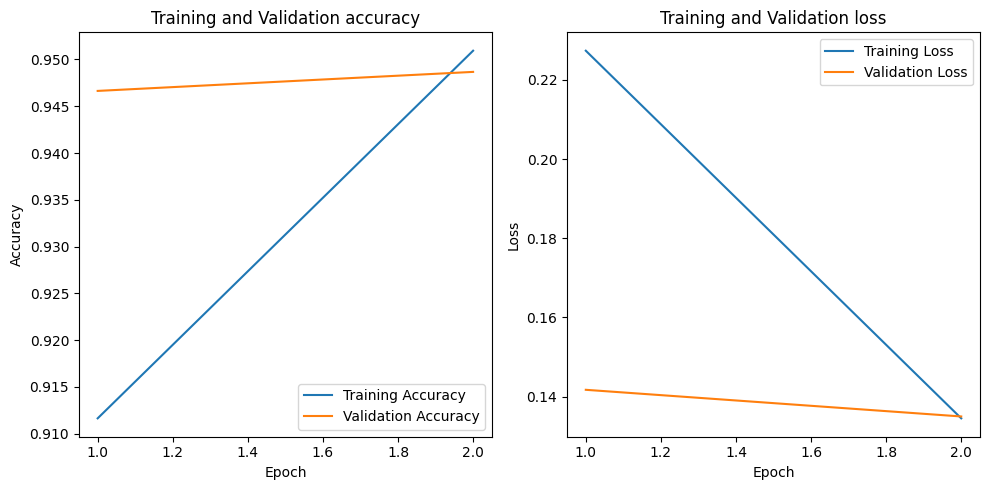

In [169]:
#Plot accuracy and loss
plotLearningCurve(r,n_epochs)

In [170]:
print("Evaluate RoBERTa Model Performance on Test set")
result = model.evaluate(test_dataset.batch(32))
print(dict(zip(model.metrics_names, result)))

Evaluate RoBERTa Model Performance on Test set
807/807 [==============================] - 34s 42ms/step - loss: 0.1365 - accuracy: 0.9486
{'loss': 0.13652575016021729, 'accuracy': 0.94859778881073}


2152/2152 [==============================] - 55s 24ms/step


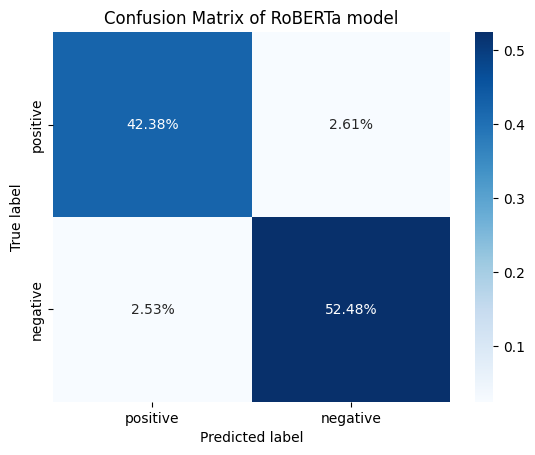

In [171]:
#Generate predictions for the test dataset
ypred = model.predict(test_dataset.batch(12))
ypred = ypred>0.5
#Get the confusion matrix
cf_matrix = confusion_matrix(ytest, ypred)
sns.heatmap(cf_matrix/np.sum(cf_matrix),annot = True,fmt ='.2%', cmap='Blues', xticklabels=['positive','negative'], yticklabels=['positive','negative'])
plt.title("Confusion Matrix of RoBERTa model")
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [172]:
print(classification_report(ytest,ypred,target_names=['Positive','Negative']))

              precision    recall  f1-score   support

    Positive       0.94      0.94      0.94     11614
    Negative       0.95      0.95      0.95     14202

    accuracy                           0.95     25816
   macro avg       0.95      0.95      0.95     25816
weighted avg       0.95      0.95      0.95     25816



### **ALBERT**

In [219]:
tokenizer = transformers.AutoTokenizer.from_pretrained('albert-base-v2')

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/684 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/760k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

In [220]:
#pass our texts to the tokenizer.
Xtrain_enc = tokenizer(Xtrain.tolist(), max_length=max_seq_len,
                         truncation=True, padding='max_length',
                         add_special_tokens=True, return_tensors='tf') #return numpy object
Xval_enc = tokenizer(Xval.tolist(), max_length=max_seq_len,
                         truncation=True, padding='max_length',
                         add_special_tokens=True, return_tensors='tf') #return numpy object
Xtest_enc = tokenizer(Xtest.tolist(), max_length=max_seq_len,
                         truncation=True, padding='max_length',
                         add_special_tokens=True, return_tensors='tf') #return numpy object

In [221]:
#preparing our datasets
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(Xtrain_enc),
    ytrain
))
val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(Xval_enc),
    yval
))
test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(Xtest_enc),
    ytest
))

In [222]:
transformer = transformers.TFAlbertModel.from_pretrained('albert-base-v2', resume_download=True)

model.safetensors:   0%|          | 0.00/47.4M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFAlbertModel: ['predictions.LayerNorm.bias', 'predictions.dense.weight', 'predictions.bias', 'predictions.decoder.bias', 'predictions.dense.bias', 'predictions.LayerNorm.weight']
- This IS expected if you are initializing TFAlbertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFAlbertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFAlbertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFAlbertModel for predictions without further training.


In [223]:
epochs = 2
max_len = max_seq_len
r,model,n_epochs = bert_model(train_dataset,val_dataset,transformer,max_len,epochs)

----Building the model----
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 15)]                 0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 15)]                 0         []                            
 )                                                                                                
                                                                                                  
 tf_albert_model (TFAlbertM  TFBaseModelOutputWithPooli   1168358   ['input_ids[0][0]',           
 odel)                       ng(last_hidden_state=(None   4          'attention_mask[0][0]']      
                             , 15, 768),                         

6885/6885 [==============================] - 442s 62ms/step - loss: 0.2288 - accuracy: 0.9122 - val_loss: 0.1557 - val_accuracy: 0.9419
Epoch 2/2
6885/6885 [==============================] - 166s 24ms/step - loss: 0.0978 - accuracy: 0.9650
Train score: [0.0978117436170578, 0.9650288820266724]
1722/1722 [==============================] - 43s 25ms/step - loss: 0.1319 - accuracy: 0.9494
Validation score: [0.13192959129810333, 0.9493535757064819]


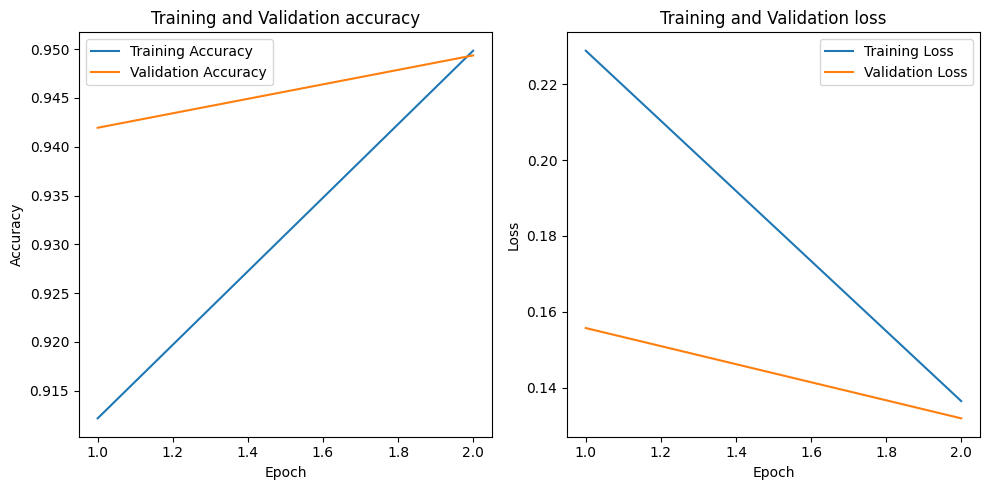

In [224]:
#Plot accuracy and loss
plotLearningCurve(r,n_epochs)

In [225]:
print("Evaluate ALBERT Model Performance on Test set")
result = model.evaluate(test_dataset.batch(32))
print(dict(zip(model.metrics_names, result)))

Evaluate ALBERT Model Performance on Test set
807/807 [==============================] - 35s 44ms/step - loss: 0.1337 - accuracy: 0.9499
{'loss': 0.13367338478565216, 'accuracy': 0.949876070022583}


2152/2152 [==============================] - 56s 25ms/step


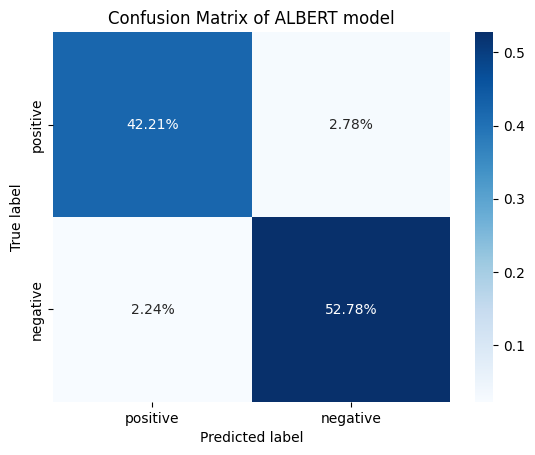

In [226]:
#Generate predictions for the test dataset
ypred = model.predict(test_dataset.batch(12))
ypred = ypred>0.5
#Get the confusion matrix
cf_matrix = confusion_matrix(ytest, ypred)
sns.heatmap(cf_matrix/np.sum(cf_matrix),annot = True,fmt ='.2%', cmap='Blues', xticklabels=['positive','negative'], yticklabels=['positive','negative'])
plt.title("Confusion Matrix of ALBERT model")
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [227]:
print(classification_report(ytest,ypred,target_names=['Positive','Negative']))

              precision    recall  f1-score   support

    Positive       0.95      0.94      0.94     11614
    Negative       0.95      0.96      0.95     14202

    accuracy                           0.95     25816
   macro avg       0.95      0.95      0.95     25816
weighted avg       0.95      0.95      0.95     25816

